In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [23]:
train_df=pd.read_csv('train_set.csv')
test_df=pd.read_csv('test_set.csv')

In [48]:
def NaiveBayes(train_set, test_set): # Function assumes that the class feature is in a column called 'class'
    
    correctly_classified=0
    
    classes=train_set['class'].unique() # Number of unique classes, in this case its a binary classification problem
    len_class_0=len(train_set[train_set['class']==classes[0]])
    len_class_1=len(train_set[train_set['class']==classes[1]])
    
    # We calculate the length of every class for computing the probability of each class
    
    P_class_0= len_class_0 / len(train_set)
    P_class_1= len_class_1/ len(train_set)
    
    class_0_features=train_set[train_set['class']==classes[0]].columns
    class_1_features=train_set[train_set['class']==classes[1]].columns
    
    # Dropping the feature column to pass only the class probabilities into the model
    # We will pass all the features of each class into a Counter object which behaves like a dictionary except that it doesn't throw an error when a new key is updated
    
    class_0_features=class_0_features.drop('class')
    class_1_features=class_1_features.drop('class')
    
    class_0_feature_ctr=Counter()
    class_1_feature_ctr=Counter()
    
    # The two for-loops below will iteratively update the probabilites of each feature of each class with Laplace smoothing applied.
    
    for feature in class_0_features:
        
        temp=((train_set[train_set['class']==classes[0]][feature].value_counts()+1)/(len_class_0+len(class_0_features))).to_dict() #Laplace smoothing is applied
        class_0_feature_ctr[feature]=temp
        
    for feature in class_1_features:
        temp=((train_set[train_set['class']==classes[1]][feature].value_counts()+1)/(len_class_1+len(class_1_features))).to_dict() #Laplace smoothing is applied
        class_1_feature_ctr[feature]=temp
        
    # Similar preprocessing done for the test set
        
    test_features=test_set.columns
    test_features=test_features.drop('class')
    
    for i in range(len(test_set)):
        
        #print('len',len(test_set))
        
        P_x_C0=np.log(P_class_0) # Initial guess for class 0
        P_x_C1=np.log(P_class_1) # Initial guess for class 1
        
        # The try/except statements are utilize to detect features that are not in a training set. Normally, an key error exception would be thrown but we will use this as 
        # an indicator that the test set has a feature that wasn't in the training set.
        # Log of probability is used to prevent underflow e.g. the program won't be able to accuratel track very small values.
            
        for feature in test_features: 
            #print(feature)
            try:
                
                P_x_C0+=np.log(class_0_feature_ctr[feature][test_df.iloc[i][feature]])
            
            except: # Feature not seen in the training set
                
                P_x_C0+=np.log(1/(len_class_0+len(test_features)))
            
            try:

                P_x_C1+=np.log(class_1_feature_ctr[feature][test_df.iloc[i][feature]])
                
            except: # Feature not seen in the training set
                
                P_x_C1+=np.log(1/(len_class_1+len(test_features)))
                
        if P_x_C0>P_x_C1:
            
            print('Instance #' ,i,'|', 'y_hat:', classes[0], '|', 'y_train:', test_set['class'].iloc[i], '|', 'posterior log prob:', round(P_x_C0,4))
            
            if test_set['class'].iloc[i]==classes[0]:
                
                correctly_classified+=1
        else:
                             
            print('Instance #',i, '|', 'y_hat: ', classes[1], '|', 'y_train:', test_set['class'].iloc[i], '|', 'posterior log prob:', round(P_x_C1,4))
            
            if test_set['class'].iloc[i]==classes[1]:
                
                correctly_classified+=1

    print ('\n' , correctly_classified, 'out of ', len(test_set), ' instances were correctly classified' )

In [49]:
NaiveBayes(train_df, test_df)

Instance # 0 | y_hat: malign_lymph | y_train: malign_lymph | posterior log prob: -17.3259
Instance # 1 | y_hat: malign_lymph | y_train: malign_lymph | posterior log prob: -17.4634
Instance # 2 | y_hat: malign_lymph | y_train: malign_lymph | posterior log prob: -29.8021
Instance # 3 | y_hat:  metastases | y_train: malign_lymph | posterior log prob: -23.9724
Instance # 4 | y_hat:  metastases | y_train: malign_lymph | posterior log prob: -15.453
Instance # 5 | y_hat: malign_lymph | y_train: malign_lymph | posterior log prob: -16.7703
Instance # 6 | y_hat: malign_lymph | y_train: malign_lymph | posterior log prob: -16.3385
Instance # 7 | y_hat: malign_lymph | y_train: malign_lymph | posterior log prob: -21.5606
Instance # 8 | y_hat: malign_lymph | y_train: malign_lymph | posterior log prob: -15.1677
Instance # 9 | y_hat: malign_lymph | y_train: malign_lymph | posterior log prob: -18.865
Instance # 10 | y_hat:  metastases | y_train: malign_lymph | posterior log prob: -17.0497
Instance # 11 

In [26]:
# This is similar to the Naive Bayes function but with no output- its solely used for testing the model and to report accuracy

def NaiveBayes_testing(train_set, test_set): # Function assumes that the class feature is in a column called 'class'
    
    correctly_classified=0
    
    classes=train_set['class'].unique()
    len_class_0=len(train_set[train_set['class']==classes[0]])
    len_class_1=len(train_set[train_set['class']==classes[1]])
    
    P_class_0= len_class_0 / len(train_set)
    P_class_1= len_class_1/ len(train_set)
    
    class_0_features=train_set[train_set['class']==classes[0]].columns
    class_1_features=train_set[train_set['class']==classes[1]].columns
    
    class_0_features=class_0_features.drop('class')
    class_1_features=class_1_features.drop('class')
    
    class_0_feature_ctr=Counter()
    class_1_feature_ctr=Counter()
    
    for feature in class_0_features:
        
        temp=((train_set[train_set['class']==classes[0]][feature].value_counts()+1)/(len_class_0+len(class_0_features))).to_dict() #Laplace smoothing is applied
        class_0_feature_ctr[feature]=temp
        
    for feature in class_1_features:
        temp=((train_set[train_set['class']==classes[1]][feature].value_counts()+1)/(len_class_1+len(class_1_features))).to_dict() #Laplace smoothing is applied
        class_1_feature_ctr[feature]=temp
        
    test_features=test_set.columns
    test_features=test_features.drop('class')
    
    for i in range(len(test_set)):
        
        #print('len',len(test_set))
        
        P_x_C0=np.log(P_class_0) # Initial guess for class 0
        P_x_C1=np.log(P_class_1) # Initial guess for class 1
            
        for feature in test_features: 
            #print(feature)
            try:
                
                P_x_C0+=np.log(class_0_feature_ctr[feature][test_df.iloc[i][feature]])
            
            except:
                
                P_x_C0+=np.log(1/(len_class_0+len(test_features)))
            
            try:

                P_x_C1+=np.log(class_1_feature_ctr[feature][test_df.iloc[i][feature]])
                
            except:
                
                P_x_C1+=np.log(1/(len_class_1+len(test_features)))
                
        if P_x_C0>P_x_C1:
            
            #print('Instance #' ,i,'|', 'y_hat:', classes[0], '|', 'y_train:', test_set['class'].iloc[i], '|', 'posterior log prob:', round(P_x_C0,4))
            
            if test_set['class'].iloc[i]==classes[0]:
                
                correctly_classified+=1
        else:
                             
            #print('Instance #',i, '|', 'y_hat: ', classes[1], '|', 'y_train:', test_set['class'].iloc[i], '|', 'posterior log prob:', round(P_x_C1,4))
            
            if test_set['class'].iloc[i]==classes[1]:
                
                correctly_classified+=1
    return round(correctly_classified/len(test_set),4)
    #print ('\n' , correctly_classified, 'out of ', len(test_set), ' instances were correctly classified' )

In [27]:
# We test four times on 25%, 50% and full training set then take the average accuracy.

training_set_size=[25,50,100]
accuracy=[]

for size in training_set_size:
    
    avg_accuracy=0
    
    for i in range(4):
    
        avg_accuracy+=NaiveBayes_testing(train_df.sample(size), test_df)
        
    accuracy.append(avg_accuracy/4)
    
accuracy    

[0.738075, 0.80355, 0.881]

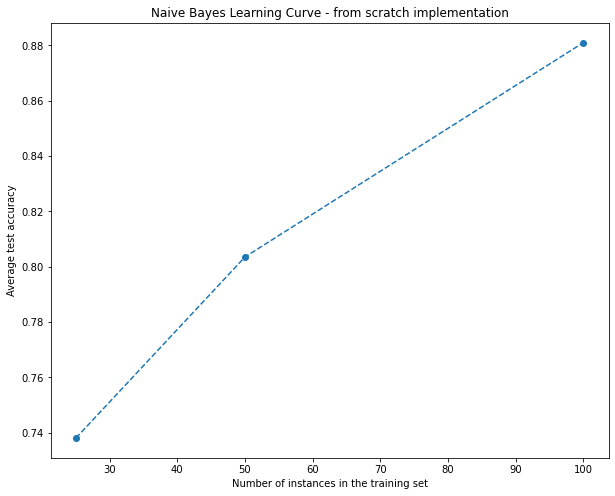

In [28]:
plt.figure(figsize=(10,8))
plt.plot(training_set_size, accuracy, 'o--')
plt.title('Naive Bayes Learning Curve - from scratch implementation')
plt.xlabel('Number of instances in the training set')
plt.ylabel('Average test accuracy')
plt.show()

## Now we implement Scikitlearn's Naive Bayes Classifier and compare it with the one we coded from scratch

In [29]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder

In [30]:
X=train_df.iloc[:, :-1]
y=train_df.iloc[:, -1:]

X_test=test_df.iloc[:, :-1]
y_test=test_df.iloc[:, -1:]

In [44]:
training_set_size=[25,50,100]
accuracy_scikitlearn=[]
accuracy_from_scratch=[]
X_enc=OrdinalEncoder()
Y_enc=OrdinalEncoder()

X_enc.fit(train_df.iloc[:, :-1])
Y_enc.fit(train_df.iloc[:, -1:])
X_test_encoded=X_enc.transform(X_test)
y_test_encoded=Y_enc.transform(y_test).ravel()

GNB=GaussianNB()

for size in training_set_size:

    avg_accuracy_scikit=0
    avg_accuracy_from_scratch=0
    
    for i in range(4):
        
        GNB_model= GaussianNB()
        train_sample=train_df.sample(size)
        X=train_sample.iloc[:, :-1]
        y=train_sample.iloc[:, -1:]
        X_encoded=X_enc.transform(X)
        #print(X_encoded)
        y_encoded=Y_enc.transform(y).ravel() 
        GNB_model.fit(X_encoded,y_encoded)
        #NB_model.predict(X_test_encoded)
        
        avg_accuracy_from_scratch+= NaiveBayes_testing(train_sample, test_df)
        avg_accuracy_scikit+=  GNB_model.score(X_test_encoded, y_test_encoded)
        
    accuracy_from_scratch.append(avg_accuracy_from_scratch/4)
    accuracy_scikitlearn.append(avg_accuracy_scikit/4)

print('From scratch model accuracy: ',accuracy_from_scratch)
print('Scikitlearn GNB accuracy: ', accuracy_scikitlearn)

From scratch model accuracy:  [0.714275, 0.8452, 0.881]
Scikitlearn GNB accuracy:  [0.5892857142857143, 0.8095238095238094, 0.8809523809523809]


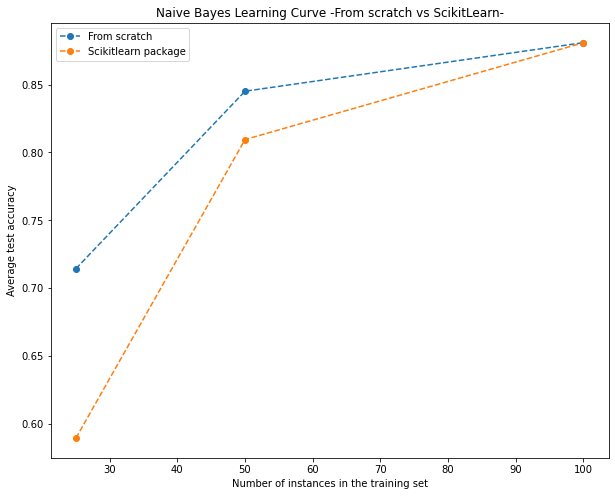

In [50]:
plt.figure(figsize=(10,8))
plt.plot(training_set_size, accuracy_from_scratch, 'o--', label='From scratch')
plt.plot(training_set_size, accuracy_scikitlearn, 'o--', label='Scikitlearn package')
plt.title('Naive Bayes Learning Curve -From scratch vs ScikitLearn-')
plt.xlabel('Number of instances in the training set')
plt.ylabel('Average test accuracy')
plt.legend()
plt.show()

### We can observe that both implementations have similar accuracies when using the full size of the training set, while the 'from scratch' implementation performed significantly better when using 25% of the training set.